<a href="https://colab.research.google.com/github/kayepatt/6310422091_BADS7105/blob/master/HW07_ProductRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install mlxtend

In [53]:
!pip install umap-learn

In [54]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF

df = pd.read_csv('ProductRecommendation.csv')


In [55]:
df.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,0,0,0,1,1,0.0,1,0,0,0.0,0,0,0,0.0,0,0.0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1.0,0,0,1,1,0,0,1,1,0,0,0.0,0,0,1,0,0,0,0,1,0,1.0,1,1,0,1.0,0,1,0,0.0,0,1.0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1.0,1,0,1,0,1,1,1,1,1,1,0.0,1,0,1,1,1,0,0,0,0,1.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0.0,0,0.0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1.0,0,0,0,1,0,0,1,1,0,1,0.0,1,0,1,0,0,1,0,0,0,0.0,1,0,1,NaN,0,0,0,1.0,0,0.0,1,0,1,1,1


In [56]:
# Import Fonts
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2021-06-14 16:45:10--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-06-14 16:45:10--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.1’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.002s  

2021-06-14 16:45:10 (44.2 MB/s) - 

In [57]:
# check unique values, and NaN
df.melt()['value'].value_counts(dropna=False)

0.0    1710
1.0    1090
NaN       6
Name: value, dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   จักรยานเสือภูเขา                 46 non-null     int64  
 1   คอลลาเจน                         46 non-null     int64  
 2   Brownie อวกาศ                    46 non-null     int64  
 3   แม่โขง                           46 non-null     int64  
 4   Botox                            46 non-null     int64  
 5   กัญชา                            46 non-null     int64  
 6   กัญชง                            46 non-null     int64  
 7   เครื่องวัดความดัน                46 non-null     int64  
 8   หลอดไฟเปลี่ยนสีได้               46 non-null     int64  
 9   คอร์ส bikini wax                 46 non-null     int64  
 10  เก้าอี้นวดไฟฟ้า                  46 non-null     int64  
 11  ต้นไม้ประดับห้อง                 46 non-null     int64  
 12  หมอนข้าง                

In [59]:
# Impute na -> ไม่เคย
df.fillna(0, inplace=True)
df.isna().any().sum()

0

In [60]:
df

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,0,0,0,1,1,0.0,1,0,0,0.0,0,0,0,0.0,0,0.0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1.0,0,0,1,1,0,0,1,1,0,0,0.0,0,0,1,0,0,0,0,1,0,1.0,1,1,0,1.0,0,1,0,0.0,0,1.0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1.0,1,0,1,0,1,1,1,1,1,1,0.0,1,0,1,1,1,0,0,0,0,1.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0.0,0,0.0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1.0,0,0,0,1,0,0,1,1,0,1,0.0,1,0,1,0,0,1,0,0,0,0.0,1,0,1,0.0,0,0,0,1.0,0,0.0,1,0,1,1,1
5,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1.0,0,0,1,0,1,0,1,1,0,0,0.0,1,0,1,0,0,0,0,1,0,0.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,0,0,1
6,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,1,0,1,0,0,0,0,0,0,0.0,1,1,0,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
7,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0.0,0,0,0,0,0,0,1,1,0,1,0.0,0,0,1,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,1
8,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1.0,0,0,0,1,1,0,1,1,0,1,0.0,0,0,1,1,0,0,0,0,0,1.0,1,0,0,1.0,0,0,0,0.0,1,1.0,0,0,0,1,1
9,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,1.0,0,0,0,0,1,0,1,1,0,0,0.0,1,0,1,0,0,0,0,0,0,0.0,1,0,0,0.0,0,1,0,0.0,0,0.0,0,0,0,1,1


In [61]:
df[['เครื่องย่อยเศษอาหาร','เครื่องย่อยเศษอาหาร.1']].corr()

,เครื่องย่อยเศษอาหาร,เครื่องย่อยเศษอาหาร.1
เครื่องย่อยเศษอาหาร,1.0,1.0
เครื่องย่อยเศษอาหาร.1,1.0,1.0


In [62]:
df.drop('เครื่องย่อยเศษอาหาร.1',axis=1, inplace=True)
df.rename({'เนื้อวากิล':'เนื้อวากิว'}, axis=1, inplace=True)

In [63]:
print("Number of users:")
print(df.shape[0])
print("\nNumber of items:")
print(df.shape[1])

Number of users:
46

Number of items:
60


In [64]:
#Total sum per item (column): 
df.loc['Total',:]= df.sum(axis=0)

#Total sum per user (row): 
df.loc[:,'Total'] = df.sum(axis=1)

df

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิว,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด,Total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,19.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,27.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,33.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,23.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,23.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,25.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19.0


In [65]:
df.describe().T.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Total,47.0,46.297872,155.405069,12.0,19.5,23.0,26.5,1088.0
ครีมกันแดด,47.0,1.957447,6.563925,1.0,1.0,1.0,1.0,46.0
กระเป๋า,47.0,1.957447,6.563925,1.0,1.0,1.0,1.0,46.0
ชาบู,47.0,1.957447,6.563925,1.0,1.0,1.0,1.0,46.0
โรตี,47.0,1.872340,6.281848,0.0,1.0,1.0,1.0,44.0
...,...,...,...,...,...,...,...,...
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,47.0,0.170213,0.636538,0.0,0.0,0.0,0.0,4.0
ห้องน้ำแมวอัตโนมัติ,47.0,0.127660,0.494184,0.0,0.0,0.0,0.0,3.0
Surfskate,47.0,0.127660,0.494184,0.0,0.0,0.0,0.0,3.0
PS5,47.0,0.085106,0.350762,0.0,0.0,0.0,0.0,2.0


In [66]:
for col in df.columns:
    print(col)

จักรยานเสือภูเขา
คอลลาเจน
Brownie อวกาศ
แม่โขง
Botox
กัญชา
กัญชง
เครื่องวัดความดัน
หลอดไฟเปลี่ยนสีได้
คอร์ส bikini wax
เก้าอี้นวดไฟฟ้า
ต้นไม้ประดับห้อง
หมอนข้าง
ตาชั่ง 
คอร์สโบท็อกกราม
แสงโสม
กะหรี่(ปั๊บ)
Lego
แฟน ที่แปลว่าพัดลม
ยาดอง
ชุดนอนไม่ได้นอน
ที่ยกน้ำหนัก (Dumbell)
เครื่องดูดฝุ่นอัตโนมัติ (robot)
เนื้อวากิว
หมูแดดเดียว
drone
เครื่องย่อยเศษอาหาร
เสื้อซีทรู
ไพ่ยิปซี
เนื้อย่าง
เครื่องทำลายเอกสาร
กระเป๋า
ชาบู
Surfskate
Board game
ชุดน้องหมา
Omakase
เม็ดมะม่วงหิมพานต์
ไฟอัจฉริยะ
บัตตาเลี่ยนที่ตัดผม
ไดร์เป่าผม Dyson
แผ่นเสียง
กรรไกรตัดขนจมูก
PS5
เครื่องตรวจน้ำตาลในเลือด
โรตี
กะปิดอง
น้องหมา
แพ็คเกจไทยเที่ยวไทย
เกมส์ FIFA Online
มะม่วงเบา
ห้องน้ำแมวอัตโนมัติ
กระเป๋า chanel
ข้าวขาหมูคากิคาจักออนไลน์
ถั่งเช่า
หมอนสุขภาพสำหรับคนนอนไม่หลับ
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น
น้ำส้มดีโด้
Software ถูกลิขสิทธิ์
ครีมกันแดด
Total


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

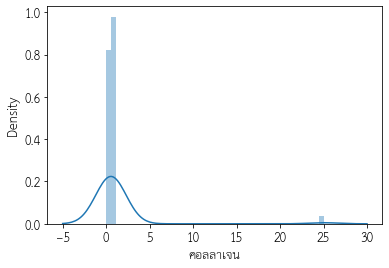

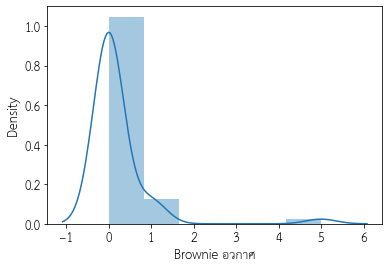

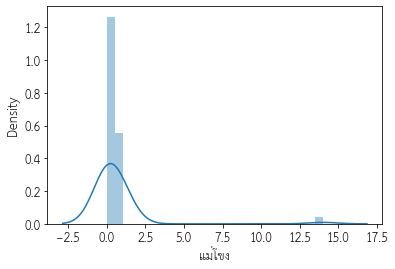

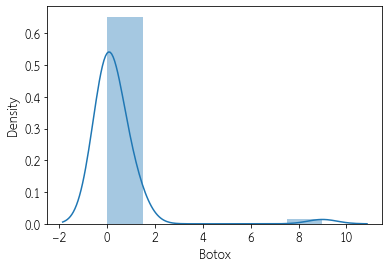

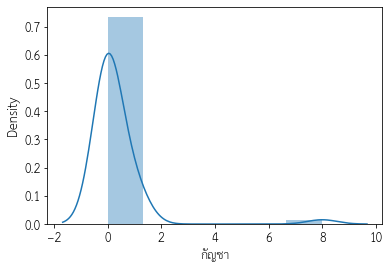

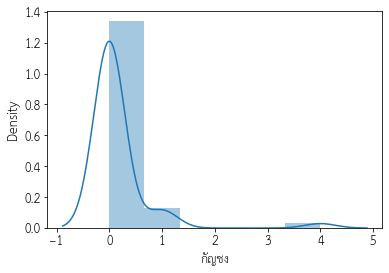

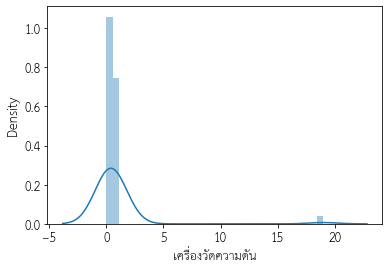

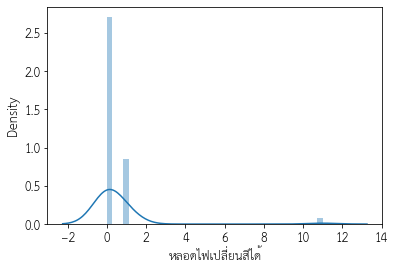

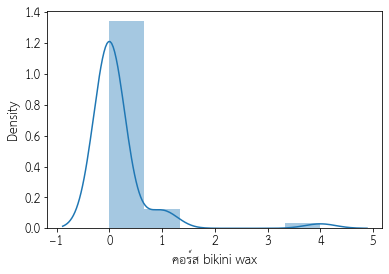

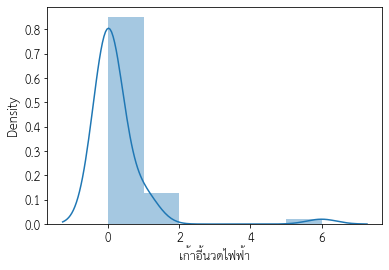

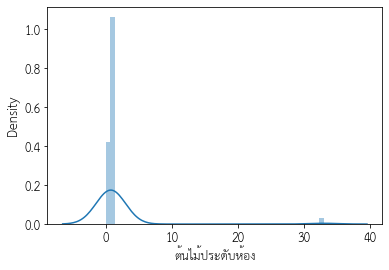

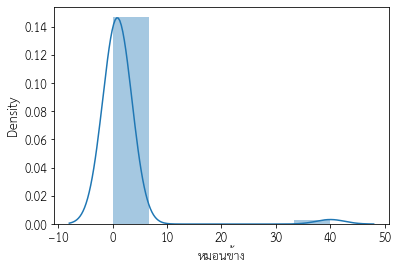

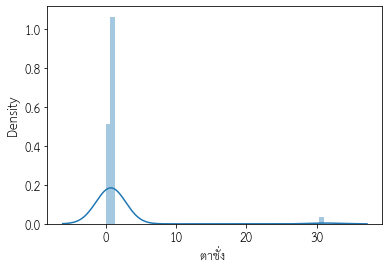

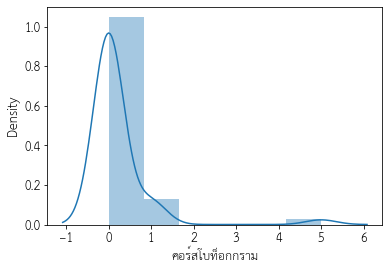

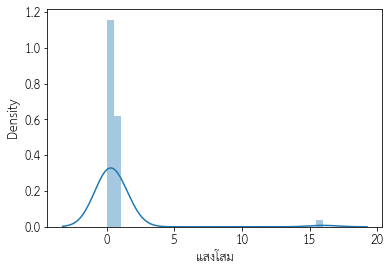

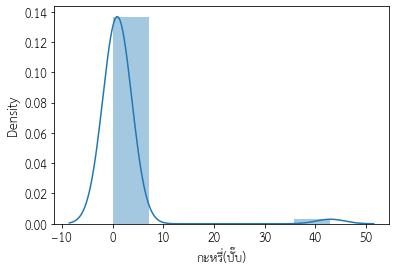

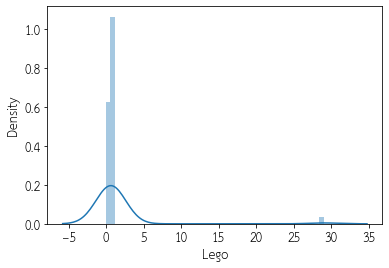

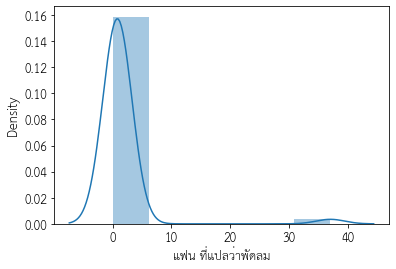

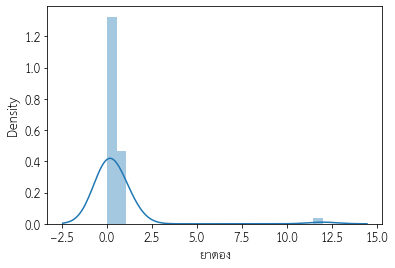

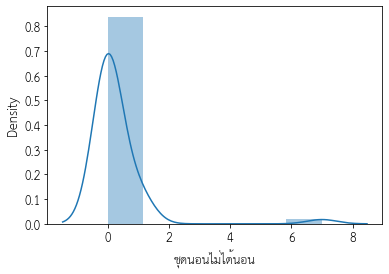

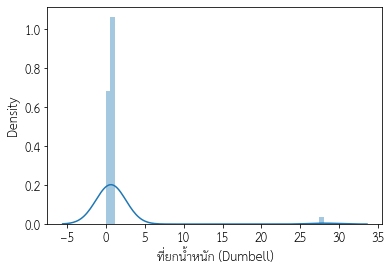

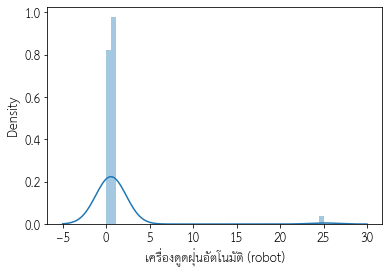

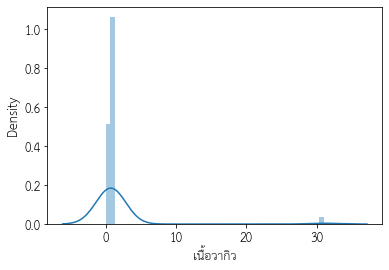

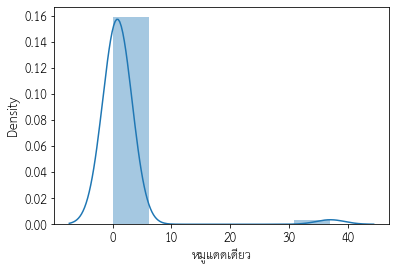

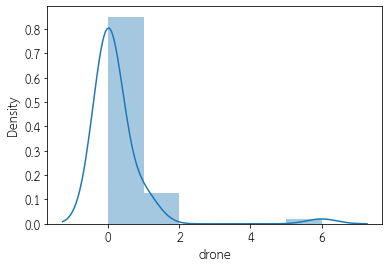

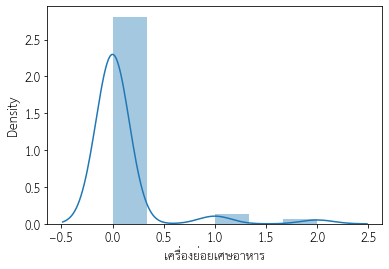

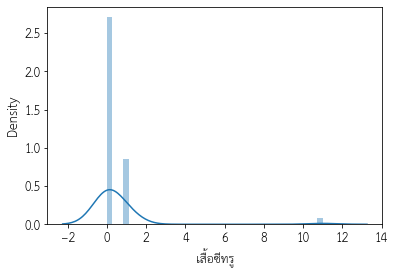

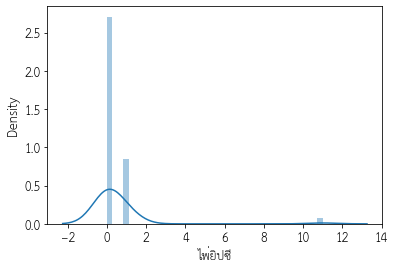

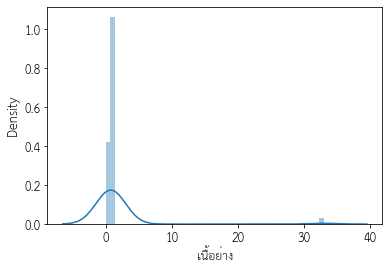

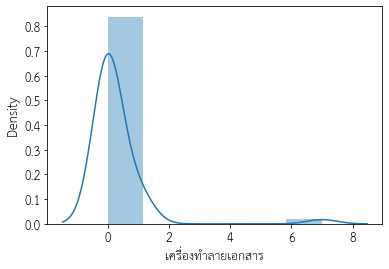

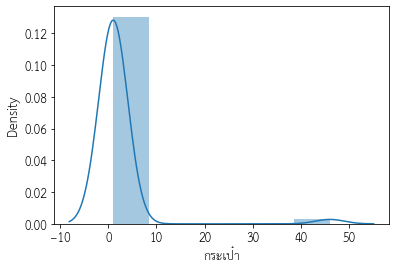

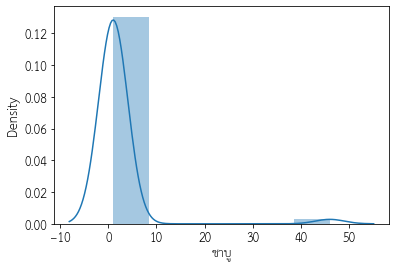

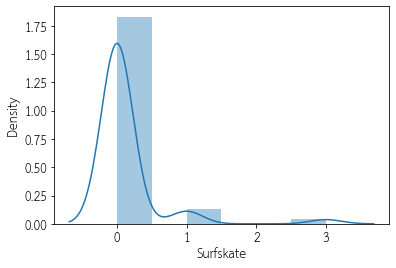

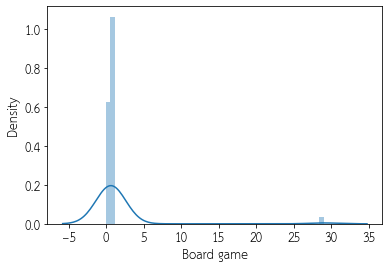

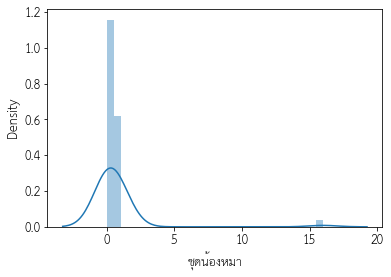

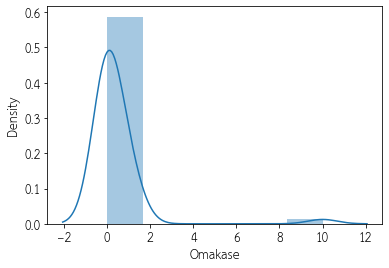

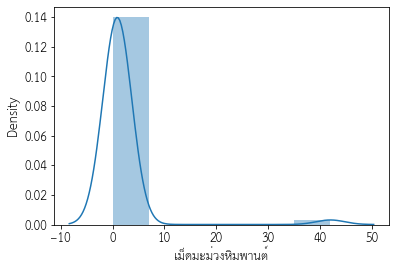

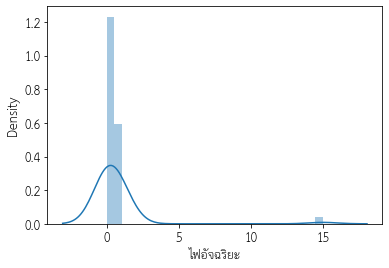

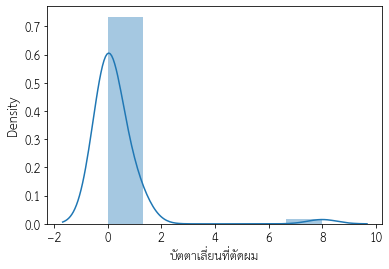

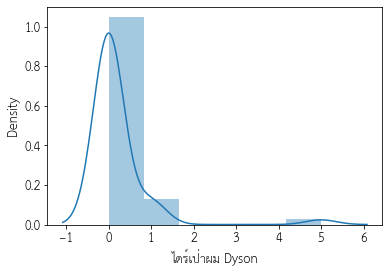

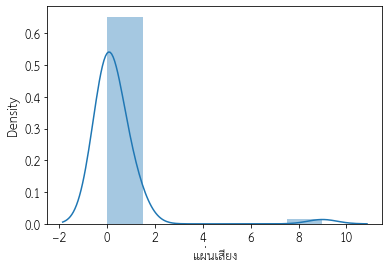

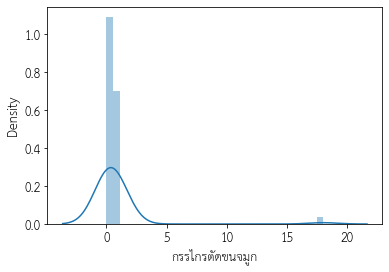

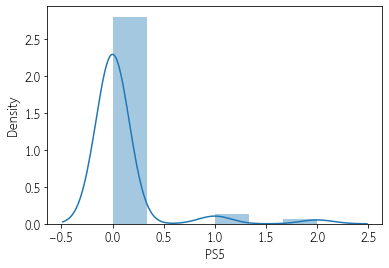

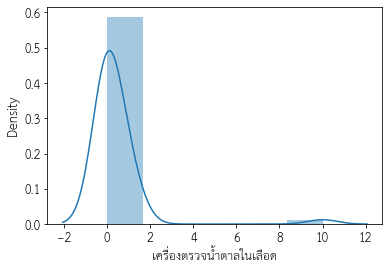

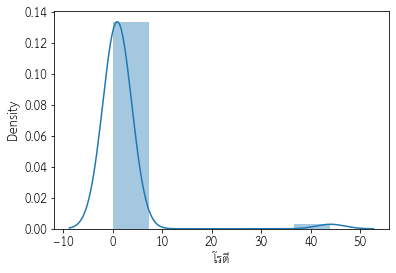

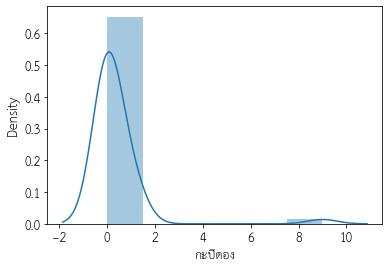

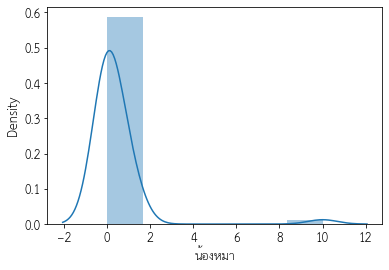

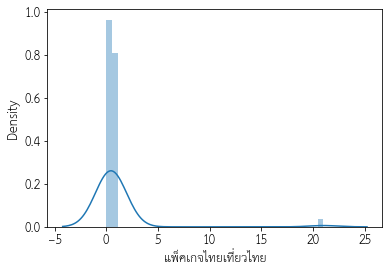

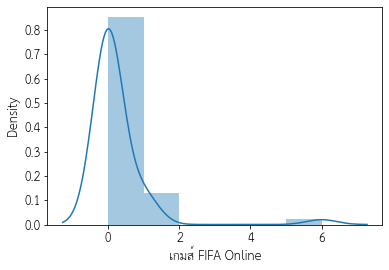

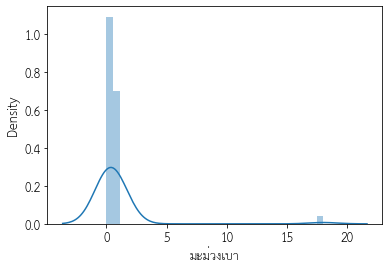

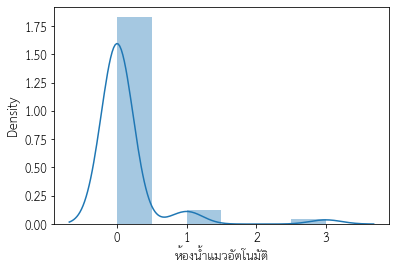

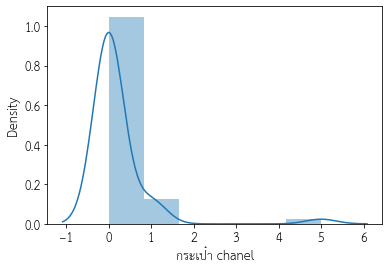

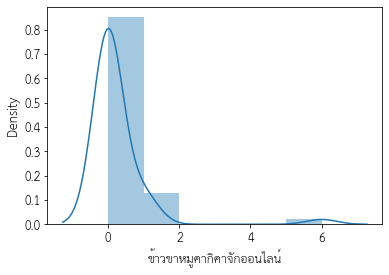

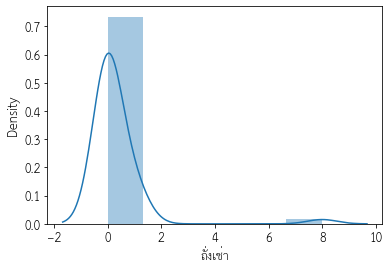

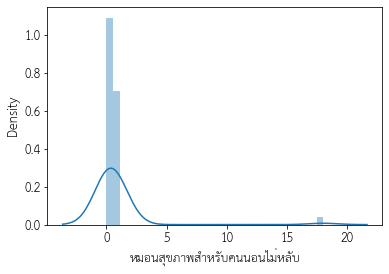

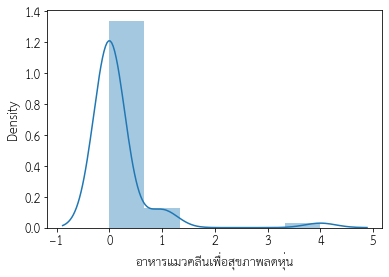

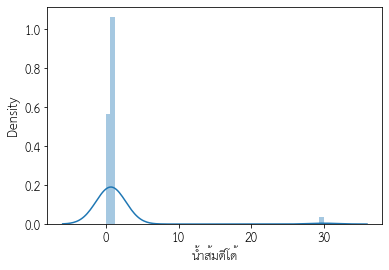

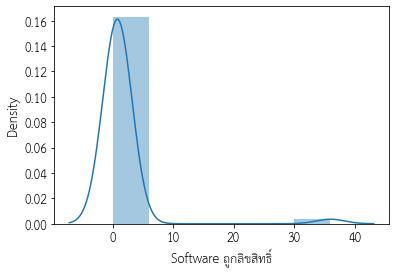

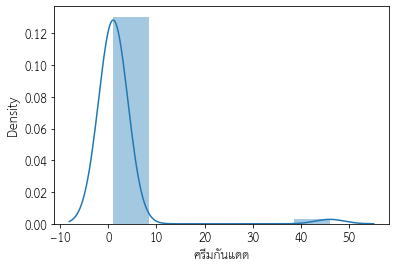

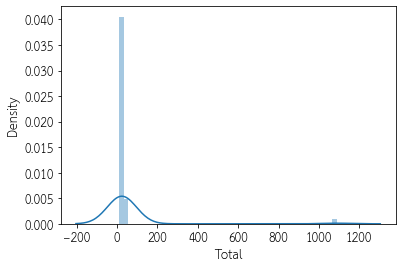

In [67]:
for i, col in enumerate(df.columns[1:]):
  plt.figure(i)
  sns.distplot(df[col])

plt.show()

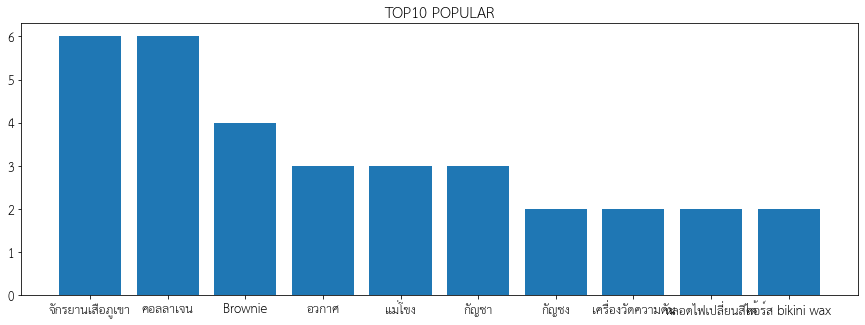

In [68]:
#plot top 10 products
import numpy as np
import matplotlib.pyplot as plt

df_for_top10_items = df['Total'].value_counts().head(10)
items_array = np.arange(len(df_for_top10_items))

plt.figure(figsize=(15,5))
items_name = ['จักรยานเสือภูเขา', 'คอลลาเจน', 'Brownie', 'อวกาศ', 'แม่โขง', 'กัญชา', 'กัญชง', 'เครื่องวัดความดัน', 'หลอดไฟเปลี่ยนสีได้', 'คอร์ส bikini wax', 
              'เก้าอี้นวดไฟฟ้า', 'ต้นไม้ประดับห้อง', 'หมอนข้าง', 'ตาชั่ง',  'คอร์สโบท็อกกราม', 'แสงโสม', 'กะหรี่(ปั๊บ)', 'Lego', 'แฟน ที่แปลว่าพัดลม', 'ยาดอง',
              'ชุดนอนไม่ได้นอน', 'ที่ยกน้ำหนัก (Dumbell)', 'เครื่องดูดฝุ่นอัตโนมัติ (robot)', 'เนื้อวากิว', 'หมูแดดเดียว', 'drone', 'เครื่องย่อยเศษอาหาร', 'เสื้อซีทรู',
              'ไพ่ยิปซี', 'เนื้อย่าง', 'เครื่องทำลายเอกสาร', 'กระเป๋า', 'ชาบู', 'Surfskate', 'Board game', 'ชุดน้องหมา', 'Omakase', 'เม็ดมะม่วงหิมพานต์',
              'ไฟอัจฉริยะ', 'บัตตาเลี่ยนที่ตัดผม', 'ไดร์เป่าผม Dyson', 'แผ่นเสียง', 'กรรไกรตัดขนจมูก', 'PS5', 'เครื่องตรวจน้ำตาลในเลือด', 'โรตี', 'กะปิดอง', 'น้องหมา',
              'แพ็คเกจไทยเที่ยวไทย', 'เกมส์ FIFA Online', 'มะม่วงเบา', 'ห้องน้ำแมวอัตโนมัติ', 'กระเป๋า chanel', 'ข้าวขาหมูคากิคาจักออนไลน์', 'ถั่งเช่า',
              'หมอนสุขภาพสำหรับคนนอนไม่หลับ', 'อาหารแมวคลีนเพื่อสุขภาพลดหุ่น', 'น้ำส้มดีโด้', 'Software ถูกลิขสิทธิ์', 'ครีมกันแดด']
plt.bar(items_array,df_for_top10_items.iloc[:])
plt.xticks(items_array,items_name)
plt.title('TOP10 POPULAR')
plt.show()

In [69]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1
df = df.applymap(encode_units)

In [70]:
from mlxtend.frequent_patterns import association_rules, apriori
import seaborn as sns

In [71]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Apply the apriori algorithm
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)


In [72]:
# Recover the association rules
rules = association_rules(frequent_itemsets, metric='lift',min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.936170,0.553191,0.531915,0.568182,1.027098,0.014033,1.034714
1,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.553191,0.936170,0.531915,0.961538,1.027098,0.014033,1.659574
2,(กระเป๋า),(คอลลาเจน),1.000000,0.553191,0.553191,0.553191,1.000000,0.000000,1.000000
3,(คอลลาเจน),(กระเป๋า),0.553191,1.000000,0.553191,1.000000,1.000000,0.000000,inf
4,(ชาบู),(คอลลาเจน),1.000000,0.553191,0.553191,0.553191,1.000000,0.000000,1.000000
5,(คอลลาเจน),(ชาบู),0.553191,1.000000,0.553191,1.000000,1.000000,0.000000,inf
6,(เม็ดมะม่วงหิมพานต์),(คอลลาเจน),0.914894,0.553191,0.510638,0.558140,1.008945,0.004527,1.011198
7,(คอลลาเจน),(เม็ดมะม่วงหิมพานต์),0.553191,0.914894,0.510638,0.923077,1.008945,0.004527,1.106383
8,(โรตี),(คอลลาเจน),0.957447,0.553191,0.553191,0.577778,1.044444,0.023540,1.058231
9,(คอลลาเจน),(โรตี),0.553191,0.957447,0.553191,1.000000,1.044444,0.023540,inf


In [73]:
# Recover the association rules
rules = association_rules(frequent_itemsets, metric='support',min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(กระเป๋า),(ชาบู),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(ชาบู),(กระเป๋า),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(ครีมกันแดด),(กระเป๋า),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(กระเป๋า),(ครีมกันแดด),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(กระเป๋า),(Total),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(Total),(กระเป๋า),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,(ครีมกันแดด),(ชาบู),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,(ชาบู),(ครีมกันแดด),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,(ชาบู),(Total),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(Total),(ชาบู),1.0,1.0,1.0,1.0,1.0,0.0,inf


In [74]:
# Recover the association rules
rules = association_rules(frequent_itemsets, metric='confidence',min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(คอลลาเจน),(กระเป๋า),0.553191,1.000000,0.553191,1.0,1.000000,0.00000,inf
1,(คอลลาเจน),(ชาบู),0.553191,1.000000,0.553191,1.0,1.000000,0.00000,inf
2,(คอลลาเจน),(โรตี),0.553191,0.957447,0.553191,1.0,1.044444,0.02354,inf
3,(คอลลาเจน),(ครีมกันแดด),0.553191,1.000000,0.553191,1.0,1.000000,0.00000,inf
4,(คอลลาเจน),(Total),0.553191,1.000000,0.553191,1.0,1.000000,0.00000,inf
5,(ต้นไม้ประดับห้อง),(กระเป๋า),0.723404,1.000000,0.723404,1.0,1.000000,0.00000,inf
6,(ต้นไม้ประดับห้อง),(ชาบู),0.723404,1.000000,0.723404,1.0,1.000000,0.00000,inf
7,(ต้นไม้ประดับห้อง),(ครีมกันแดด),0.723404,1.000000,0.723404,1.0,1.000000,0.00000,inf
8,(ต้นไม้ประดับห้อง),(Total),0.723404,1.000000,0.723404,1.0,1.000000,0.00000,inf
9,(หมอนข้าง),(กระเป๋า),0.872340,1.000000,0.872340,1.0,1.000000,0.00000,inf


In [75]:
#filter rules
rules[(rules['lift'] >= 1) &
      (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(คอลลาเจน),(กระเป๋า),0.553191,1.000000,0.553191,1.0,1.000000,0.000000,inf
1,(คอลลาเจน),(ชาบู),0.553191,1.000000,0.553191,1.0,1.000000,0.000000,inf
2,(คอลลาเจน),(โรตี),0.553191,0.957447,0.553191,1.0,1.044444,0.023540,inf
3,(คอลลาเจน),(ครีมกันแดด),0.553191,1.000000,0.553191,1.0,1.000000,0.000000,inf
4,(คอลลาเจน),(Total),0.553191,1.000000,0.553191,1.0,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
122436,"(เนื้อย่าง, หมูแดดเดียว, แฟน ที่แปลว่าพัดลม, T...","(โรตี, ชาบู, กระเป๋า, เม็ดมะม่วงหิมพานต์, กะหร...",0.510638,0.851064,0.510638,1.0,1.175000,0.076053,inf
122437,"(เนื้อย่าง, หมูแดดเดียว, แฟน ที่แปลว่าพัดลม, เ...","(โรตี, ชาบู, กระเป๋า, Total, ครีมกันแดด, กะหรี...",0.510638,0.914894,0.510638,1.0,1.093023,0.043459,inf
122438,"(เนื้อย่าง, หมูแดดเดียว, แฟน ที่แปลว่าพัดลม, ก...","(โรตี, ชาบู, กระเป๋า, Total, เม็ดมะม่วงหิมพานต...",0.510638,0.872340,0.510638,1.0,1.146341,0.065188,inf
122439,"(เนื้อย่าง, หมูแดดเดียว, แฟน ที่แปลว่าพัดลม, ค...","(โรตี, ชาบู, กระเป๋า, Total, เม็ดมะม่วงหิมพานต...",0.510638,0.851064,0.510638,1.0,1.175000,0.076053,inf


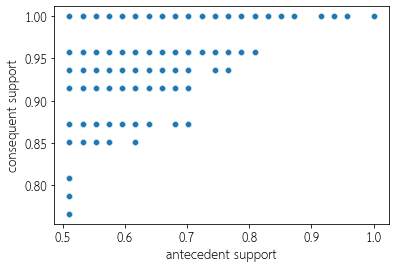

In [76]:
sns.scatterplot(x="antecedent support", y="consequent support", data=rules)

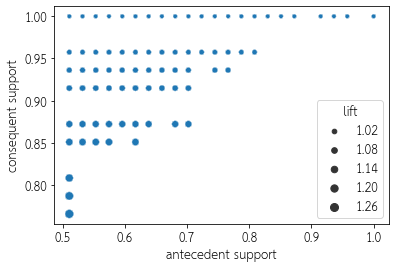

In [77]:
 sns.scatterplot(x="antecedent support",
                y="consequent support",
                size="lift",
                data=rules)

In [78]:
frequent_itemsets2 = apriori(df, min_support = 0.10, use_colnames = True, max_len = 2)
# Generate association rules
rules = association_rules(frequent_itemsets2, metric = 'support', min_threshold = 0.00)

In [79]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index

In [80]:
# Define coordinates and label
coords = rules[['antecedent','consequent','rule']]
# Print example
print(coords.head(1))

  antecedent        consequent  rule
0   คอลลาเจน  จักรยานเสือภูเขา     0


In [81]:
 # Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents',
                                values='support')

In [82]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

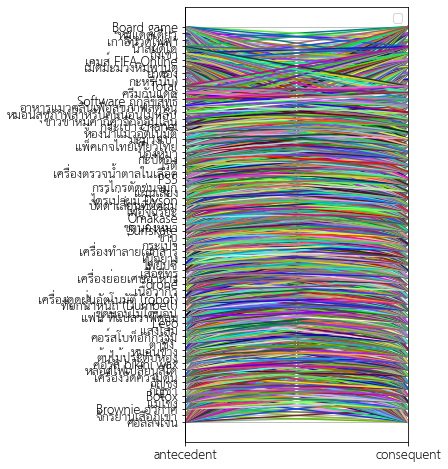

In [83]:
 # Generate frequent itemsets
frequent_itemsets = apriori(df, min_support = 0.01, use_colnames = True, max_len = 2)
# Generate association rules
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.00)
# Generate coordinates and print example
coords = rules_to_coordinates(rules)
# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()